<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
import seaborn as sns

# **Clustering**

## **K-Means Clustering**

### Scratch Code

In [ ]:
#points is the list of tuples consisting of coordinates of points.
#centroids is the list of tuples consisting of coordinates of centroid points
import numpy as np

#Function to calculate the distance between two points
def calc_dist(p1, p2):
    dist=0
    for i in range(len(p1)):
        dist += (p1[i]-p2[i])**2

  return dist**0.5

#Function to update the centroids of a cluster lst
def update_centroid(lst):
    """lst is a 2d numpy array consisting of points in a cluster"""

    new_centroid = np.mean(lst,axis=0)

    #YOUR CODE GOES HERE
    return new_centroid

#Perform the k-means algorithm to cluster the points
def k_means(points, centroids):

  #groups is a 2d list where groups[i] will have all the points corresponding to the ith cluster
  groups = [[] for i in range(len(centroids))]
  for pnt in points:

    #tmp is a list to store the distance of points from each centroid. tmp[j] is the distance of jth centroid from pnt
    tmp = [0]*len(centroids)

    for i,centroid in enumerate(centroids):
      tmp[i] = calc_dist(pnt, centroid)

    #calculate the minimum distance from a centroid from all the centroid distances
    min_d = min(tmp)

    #find the index of minimum distance from tmp
    group_id = tmp.index(min_d)

    #store the point into the sublist of that nearest centroid
    groups[group_id].append(pnt)

  new_centroid = []

  #update the centroids of each cluster
  for lst in groups:
    #update the centroid
    new_centroid.append(upd_centroid(lst))
  return new_centroid


#Perform 10 iterations of k-means algorithm
for i in range(10):
  centroids = k_means(points, centroids)
  print('Centroids after ' + str(i+1) + 'th iteration: ',centroids)

In [ ]:
import numpy as np
points = eval(input())
centroids = eval(input())


#function returns the manhattan distance
def calc_dist(p1, p2):
    dist = 0
    #YOUR CODE GOES HERE
    for i in range(len(p1)):
        dist += abs(p1[i]-p2[i])
    return dist

#function returns the updated centroid for the cluster in lst
def update_centroid(lst):
    new_centroid = None

    #YOUR CODE GOES HERE
    new_centroid = np.mean(lst, axis = 0)
    return new_centroid

#function performs one iteration of k-means
def k_means(points, centroids):
    # clusters[i] stores all the points with label i
    clusters = [[] for i in range(len(centroids))]

    for pnt in points:
        #tmp[i] stores the distance of pnt from centroid[i]
        tmp = [0] * len(centroids)
        for i,centroid in enumerate(centroids):
            tmp[i] = calc_dist(pnt, centroid)   #calculate the distance between point and centroid

        cluster_id = np.argmin(tmp)  #index of the centroid from which pnt is closest
        clusters[cluster_id].append(pnt)


    #update the centroid of each cluster
    new_centroid = []
    for cluster in clusters:
        new_centroid.append(update_centroid(cluster)) #update the centroid of cluster

    return new_centroid

for i in range(5):
    centroids = k_means(points, centroids)  #perform ith iteration on data to update clusters
    print(np.round(centroids,2))

### Sklearn Code

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-02-11 06:00:45--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 64.233.183.138, 64.233.183.113, 64.233.183.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.183.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-02-11 06:00:45--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.159.132, 2607:f8b0:4001:c58::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.159.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
X = df.drop(["ID"], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_clicks                 2500 non-null   int64  
 1   n_visits                 2500 non-null   int64  
 2   amount_spent             2500 non-null   float64
 3   amount_discount          2500 non-null   float64
 4   days_since_registration  2500 non-null   int64  
 5   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 117.3 KB


In [ ]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.06688963, 0.22088353, 0.03257084, 0.01301296, 0.45330739,
        0.4017094 ],
       [0.41220736, 0.14457831, 0.0973327 , 0.00234276, 0.44357977,
        0.29059829],
       [0.39297659, 0.36947791, 0.17623449, 0.34768545, 0.48054475,
        0.6991453 ],
       ...,
       [0.27173913, 0.40562249, 0.        , 0.        , 0.16342412,
        0.77606838],
       [0.18478261, 0.08835341, 0.48580837, 0.03217462, 0.21595331,
        0.36752137],
       [0.63879599, 0.45381526, 0.21235018, 0.43873046, 0.48249027,
        0.25470085]])

In [ ]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)


In [ ]:
y_pred

array([2, 2, 1, ..., 3, 0, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.27330589, 0.32493667, 0.11230841, 0.06740043, 0.56620473,
        0.34602498],
       [0.28589783, 0.31533458, 0.10716208, 0.06305475, 0.2394147 ,
        0.33093295]])

In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,2
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,2
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


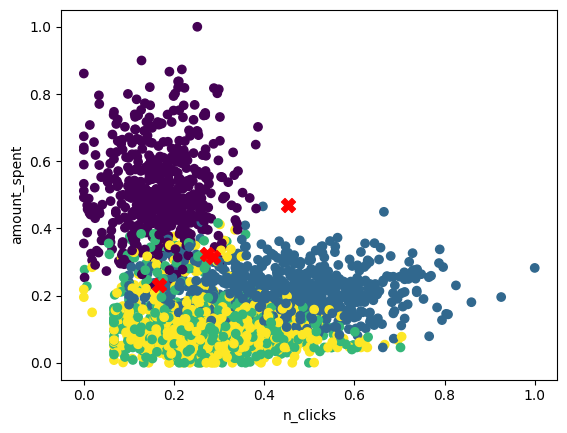

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('n_clicks')
    plt.ylabel('amount_spent')

viz_clusters(kmeans)

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar.head(4)

,label,variable,value
0,0,n_clicks,0.167630
1,1,n_clicks,0.453368
2,2,n_clicks,0.273382
3,3,n_clicks,0.285828


In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()

### Inertia & Elbow method of Fixing K(No of Clusters)

In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', n_init=1, random_state=0)

In [ ]:
kmeans_iter1.inertia_

280.1650962612106

In [ ]:
kmeans_iter2.inertia_

234.8500598769407

In [ ]:
kmeans_iter3.inertia_

193.00182851000528

In [ ]:
intertia_array = []
for k in range(1,21):
    kmeans_iter = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
    kmeans_iter.fit(X)

    intertia_array.append(kmeans_iter.inertia_)

intertia_array

[467.3446956604183,
 376.30265382065414,
 280.1650962612106,
 247.2474266713442,
 234.8500598769407,
 218.25716680920254,
 201.68614388982303,
 193.00182851000528,
 186.69455323130146,
 181.2987075168824,
 172.6434154148011,
 167.75075191302352,
 163.99726179999004,
 160.02589839049818,
 155.96257270390618,
 151.88555501637668,
 149.78372548751932,
 146.70272814763575,
 141.84803539032734,
 140.56076784109888]

Text(0, 0.5, 'Inertia')

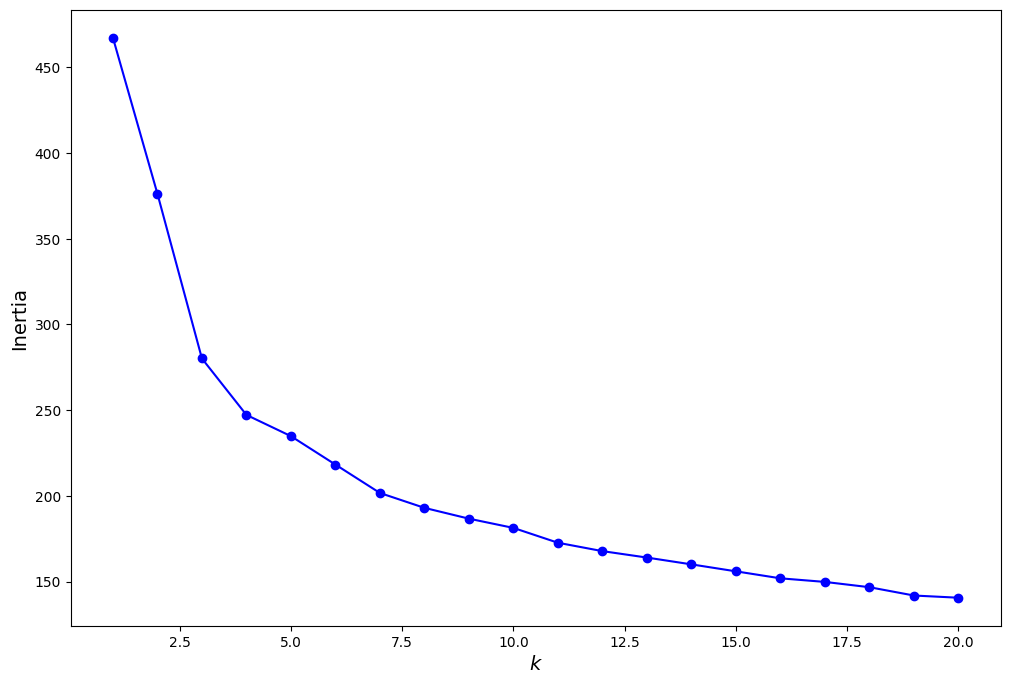

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), intertia_array, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

## **K-Means++**

### Initialization of Centroids

In [ ]:
# Concept Methodology for Probablistic Selection of Centrois based on Distance
for x in range(10):
    print(np.random.choice(['A','B'], p=[0.8, 0.2]))

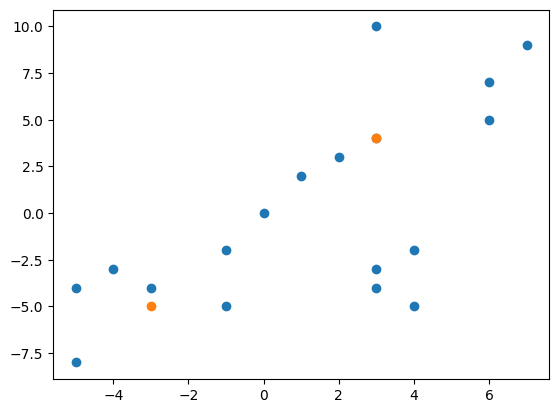

[((4, -5), 7.0),
 ((7, 9), 6.4031242374328485),
 ((3, -3), 6.324555320336759),
 ((4, -2), 6.082762530298219),
 ((3, -4), 6.082762530298219),
 ((3, 10), 6.0),
 ((0, 0), 5.0),
 ((6, 7), 4.242640687119285),
 ((-1, -2), 3.605551275463989),
 ((-5, -8), 3.605551275463989),
 ((6, 5), 3.1622776601683795),
 ((1, 2), 2.8284271247461903),
 ((-5, -4), 2.23606797749979),
 ((-4, -3), 2.23606797749979),
 ((-1, -5), 2.0),
 ((2, 3), 1.4142135623730951),
 ((-3, -4), 1.0),
 ((3, 4), 0.0)]

In [ ]:
import matplotlib.pyplot as plt
li=[(1,2),(2,3),(-1,-2),(3,4),(4,-2),(3,-3),(-5,-4),(3,10),(-3,-4),(7,9),(6,5),(3,-4),(-4,-3),(-1,-5),(-5,-8),(6,7),(4,-5),(0,0)]
x=[f[0] for f in li]
y=[l[1] for l in li]
plt.scatter(x=x,y=y)
plt.scatter(x=(-3,3),y=(-5,4))
plt.show()
def eucledian(fixed,point):
 return ((fixed[0]-point[0])**2 + (fixed[1]-point[1])**2)**0.5
x = []
for i in li:
 x.append((i, min(eucledian([3,4],i), eucledian([-3,-5],i)))) # Finding Minimum distancs from existing Centroids
sorted(x, key=lambda x: x[1], reverse=True) #Sorting the data to Find the point with Maximum of above minimum distance to selct next Centroid

### Sklearn Code

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, init = 'k-means++', random_state = 50, n_init=10)
y_km = km.fit_predict(scaled_df)

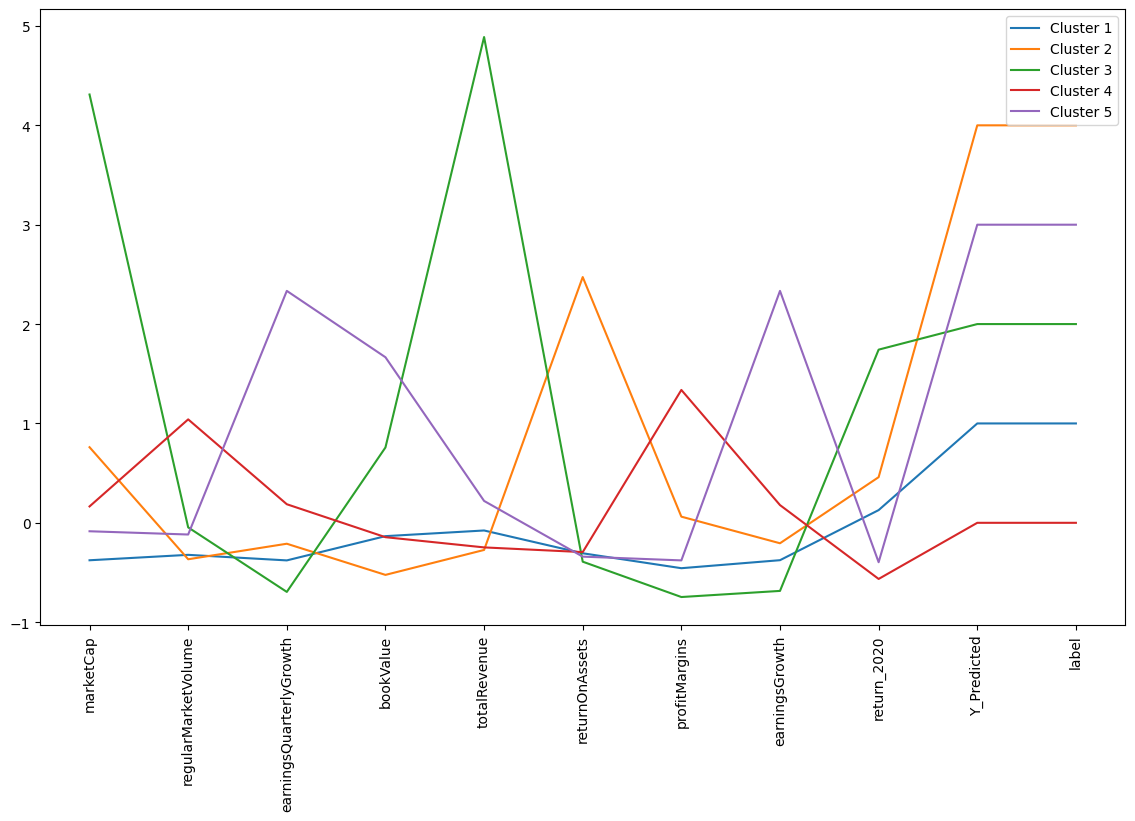

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['km_label'] = pd.Series(y_km, index=scaled_df.index)

clustered_df_km = scaled_df.groupby('km_label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df_km.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


## **Hierachial Clustering**

https://nlp.stanford.edu/IR-book/completelink.html

In [ ]:
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame({'id':[1,2,3,4,5], 'marks':[10,7,28,20,25]})
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

--2024-01-20 12:07:38--  https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb
Resolving drive.google.com (drive.google.com)... 2404:6800:4007:81e::200e, 142.250.183.238
Connecting to drive.google.com (drive.google.com)|2404:6800:4007:81e::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb&export=download [following]
--2024-01-20 12:07:38--  https://drive.usercontent.google.com/download?id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2404:6800:4007:82a::2001, 142.250.196.33
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2404:6800:4007:82a::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3053 (3.0K) [application/octet-stream]
Saving to: ‘ind_nifty50list.csv’

ind_nifty50list.csv 100%[===================>]   2

In [ ]:
# !pip install yfinance

In [ ]:
# Since yfinance is an old library, it also has some glitches, so we install this library as a fix
# !pip install fix-yahoo-finance

In [ ]:
stocks_df = pd.read_csv("./ind_nifty50list.csv")
list_of_symbols = list(stocks_df['Symbol'])
stocks_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [ ]:
yf_symbols = list(map(lambda x: x + '.NS', list_of_symbols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [ ]:
import yfinance as yf


stock_financials = {
    'marketCap': [],
    'regularMarketVolume': [],
    'earningsQuarterlyGrowth': [],
    'bookValue': [],
    'totalRevenue': [],
    'returnOnAssets': [],
    'profitMargins': [],
    'earningsGrowth': []
    }

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials['marketCap'].append(stock_info.get('marketCap', None))
    stock_financials['regularMarketVolume'].append(stock_info.get('regularMarketVolume', None))
    stock_financials['earningsQuarterlyGrowth'].append(stock_info.get('earningsQuarterlyGrowth', None))
    stock_financials['bookValue'].append(stock_info.get('bookValue', None))
    stock_financials['totalRevenue'].append(stock_info.get('totalRevenue', None))
    stock_financials['returnOnAssets'].append(stock_info.get('returnOnAssets', None))
    stock_financials['profitMargins'].append(stock_info.get('profitMargins', None))
    stock_financials['earningsGrowth'].append(stock_info.get('earningsGrowth', None))

In [ ]:
df = pd.DataFrame(stock_financials)
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,2489453379584,449280,0.042,225.380,234769793024,0.06029,0.26992,0.041
1,3035549925376,119322,0.350,172.706,354908110848,NaN,0.15321,0.349
2,3443842351104,1599248,0.105,462.233,595522813952,0.01024,0.22033,0.104
3,2020928126976,42994,0.175,1036.725,403337510912,0.14867,0.16963,0.188
4,4519478427648,119309,0.277,989.308,287215910912,0.04705,0.45675,0.276


In [ ]:
df.shape

(50, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                50 non-null     int64  
 1   regularMarketVolume      50 non-null     int64  
 2   earningsQuarterlyGrowth  44 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             50 non-null     int64  
 5   returnOnAssets           43 non-null     float64
 6   profitMargins            50 non-null     float64
 7   earningsGrowth           44 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 3.3 KB


In [ ]:
import yfinance as yf

stock_prices = yf.download(yf_symbols, start='2020-01-01')['Adj Close']
stock_prices.columns = list_of_symbols

[*********************100%%**********************]  50 of 50 completed


In [ ]:
stock_prices.shape

(1008, 50)

In [ ]:
stock_prices.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-16,1193.349976,3296.899902,1119.099976,7293.950195,1623.500000,7456.649902,1095.900024,472.850006,5130.600098,1302.349976,...,1313.449951,1143.699951,818.849976,137.250000,3843.490479,1320.400024,3820.300049,9969.599609,564.500000,485.000000
2024-01-17,1166.849976,3242.300049,1082.300049,7165.950195,1586.150024,7358.850098,1085.250000,471.649994,5061.700195,1294.000000,...,1299.000000,1138.599976,805.549988,131.649994,3866.683105,1326.750000,3830.050049,9854.650391,551.000000,482.399994
2024-01-18,1154.050049,3163.850098,1097.500000,7083.600098,1581.150024,7265.549805,1087.050049,473.200012,5015.149902,1322.949951,...,1335.750000,1146.800049,819.049988,131.000000,3884.600098,1355.150024,3734.699951,9892.250000,544.200012,482.649994
2024-01-19,1152.449951,3165.850098,1116.550049,7136.549805,1600.500000,7319.100098,1125.000000,480.950012,5138.649902,1327.949951,...,1335.599976,1161.699951,823.549988,134.250000,3943.050049,1389.900024,3810.600098,10093.700195,553.400024,485.049988
2024-01-20,1152.449951,3165.850098,1116.550049,7136.549805,1600.500000,7319.100098,1125.000000,480.950012,5138.649902,1327.949951,...,1335.599976,1161.699951,823.549988,134.250000,3943.050049,1389.900024,3810.600098,10093.700195,553.400024,485.049988


In [ ]:
# splitting data by year - 2020 returns
price_2020 = stock_prices.loc["2020-01-02 00:00:00":"2020-12-31 00:00:00"]

# to see % growth of the stock: ((endDate/startDate) - 1) * 100
stock_prices.loc['returns_2020'] = (price_2020.loc['2020-08-04 00:00:00'] / price_2020.loc['2020-01-02 00:00:00'] - 1)*100

stock_prices

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,365.911560,1743.498291,746.799988,2640.764648,935.770325,4163.675293,447.652802,372.358124,2787.020508,466.001068,...,416.195709,313.626343,183.876907,40.974754,1999.319092,642.186340,1139.831177,3991.287109,557.155396,243.122696
2020-01-02 00:00:00,371.240570,1741.019287,755.029114,2616.369873,948.457336,4178.188965,449.529144,369.252991,2799.627686,463.651031,...,416.818604,313.142120,193.148010,42.472710,1990.140747,645.514709,1140.670166,4167.827148,563.974792,243.711609
2020-01-03 00:00:00,370.610809,1702.856934,741.064636,2575.334473,932.517578,4126.430664,449.430389,366.185638,2786.241211,460.174866,...,426.066406,308.154724,190.506256,42.371971,2029.803223,653.140808,1124.975464,4142.690918,559.523254,246.459869
2020-01-06 00:00:00,368.382263,1659.833618,721.414612,2546.496582,902.269775,3932.824707,444.048279,355.317474,2770.883545,457.041412,...,421.610199,302.247284,185.073181,41.456554,2029.617920,649.180298,1143.631348,4081.717285,554.029846,247.490463
2020-01-07 00:00:00,372.839264,1676.605469,723.908264,2546.747803,907.553040,3943.599609,439.554932,349.144928,2784.224121,458.852966,...,427.791321,304.958862,184.126129,41.706211,2034.599609,654.825989,1144.963867,4165.175781,563.595947,250.484100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17 00:00:00,1166.849976,3242.300049,1082.300049,7165.950195,1586.150024,7358.850098,1085.250000,471.649994,5061.700195,1294.000000,...,1299.000000,1138.599976,805.549988,131.649994,3866.683105,1326.750000,3830.050049,9854.650391,551.000000,482.399994
2024-01-18 00:00:00,1154.050049,3163.850098,1097.500000,7083.600098,1581.150024,7265.549805,1087.050049,473.200012,5015.149902,1322.949951,...,1335.750000,1146.800049,819.049988,131.000000,3884.600098,1355.150024,3734.699951,9892.250000,544.200012,482.649994
2024-01-19 00:00:00,1152.449951,3165.850098,1116.550049,7136.549805,1600.500000,7319.100098,1125.000000,480.950012,5138.649902,1327.949951,...,1335.599976,1161.699951,823.549988,134.250000,3943.050049,1389.900024,3810.600098,10093.700195,553.400024,485.049988


In [ ]:
stock_prices = stock_prices.transpose()
stock_prices.head()

Date,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,...,2024-01-10 00:00:00,2024-01-11 00:00:00,2024-01-12 00:00:00,2024-01-15 00:00:00,2024-01-16 00:00:00,2024-01-17 00:00:00,2024-01-18 00:00:00,2024-01-19 00:00:00,2024-01-20 00:00:00,returns_2020
ADANIPORTS,365.911560,371.240570,370.610809,368.382263,372.839264,373.662872,379.621704,379.863953,378.216797,377.102539,...,1214.349976,1202.949951,1207.099976,1203.099976,1193.349976,1166.849976,1154.050049,1152.449951,1152.449951,-16.891368
ASIANPAINT,1743.498291,1741.019287,1702.856934,1659.833618,1676.605469,1680.883423,1723.421021,1742.866577,1754.874146,1768.729248,...,3286.850098,3288.199951,3277.800049,3273.899902,3296.899902,3242.300049,3163.850098,3165.850098,3165.850098,-3.813726
AXISBANK,746.799988,755.029114,741.064636,721.414612,723.908264,722.661438,740.964844,738.171936,735.528748,746.002014,...,1107.000000,1125.750000,1120.349976,1119.500000,1119.099976,1082.300049,1097.500000,1116.550049,1116.550049,-43.305377
BAJAJ-AUTO,2640.764648,2616.369873,2575.334473,2546.496582,2546.747803,2564.604004,2586.777100,2599.770996,2593.777100,2600.106934,...,7053.750000,7298.850098,7301.950195,7301.950195,7293.950195,7165.950195,7083.600098,7136.549805,7136.549805,-0.566455
BAJFINANCE,935.770325,948.457336,932.517578,902.269775,907.553040,912.526978,937.446777,935.151794,943.433472,953.371460,...,1671.849976,1669.250000,1651.900024,1632.400024,1623.500000,1586.150024,1581.150024,1600.500000,1600.500000,-35.138667


In [ ]:
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df['return_2020'] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,2489453379584,449280,0.042,225.380,234769793024,0.06029,0.26992,0.041,-16.891368
ASIANPAINT,3035549925376,119322,0.350,172.706,354908110848,NaN,0.15321,0.349,-3.813726
AXISBANK,3443842351104,1599248,0.105,462.233,595522813952,0.01024,0.22033,0.104,-43.305377
BAJAJ-AUTO,2020928126976,42994,0.175,1036.725,403337510912,0.14867,0.16963,0.188,-0.566455
BAJFINANCE,4519478427648,119309,0.277,989.308,287215910912,0.04705,0.45675,0.276,-35.138667


In [ ]:
df.isna().sum()

marketCap                  0
regularMarketVolume        0
earningsQuarterlyGrowth    6
bookValue                  1
totalRevenue               0
returnOnAssets             7
profitMargins              0
earningsGrowth             6
return_2020                1
dtype: int64

In [ ]:
df['returnOnAssets'] = df['returnOnAssets'].replace(np.nan, 0)

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(42, 9)

In [ ]:
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,2489453379584,449280,0.042,225.380,234769793024,0.06029,0.26992,0.041,-16.891368
ASIANPAINT,3035549925376,119322,0.350,172.706,354908110848,0.00000,0.15321,0.349,-3.813726
AXISBANK,3443842351104,1599248,0.105,462.233,595522813952,0.01024,0.22033,0.104,-43.305377
BAJAJ-AUTO,2020928126976,42994,0.175,1036.725,403337510912,0.14867,0.16963,0.188,-0.566455
BAJFINANCE,4519478427648,119309,0.277,989.308,287215910912,0.04705,0.45675,0.276,-35.138667


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [ ]:
scaled_df

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,-0.325431,-0.287616,-0.494051,-0.428930,-0.547162,-0.078461,1.138794,-0.500444,-0.356203
ASIANPAINT,-0.164693,-0.336458,0.444566,-0.487109,-0.470797,-1.248391,-0.059463,0.442014,0.099408
AXISBANK,-0.044517,-0.117392,-0.302061,-0.167324,-0.317852,-1.049683,0.629656,-0.307669,-1.276439
BAJAJ-AUTO,-0.463336,-0.347756,-0.088739,0.467208,-0.440013,1.636556,0.109121,-0.050635,0.212539
BAJFINANCE,0.272085,-0.336460,0.222102,0.414835,-0.513825,-0.335384,3.056971,0.218639,-0.991919
BAJAJFINSV,-0.308416,-0.330630,0.106298,-0.325399,-0.103224,-0.239135,-0.815830,0.059523,-0.590700
BHARTIARTL,0.887027,-0.247280,-1.764841,-0.527216,0.233535,-0.173740,-1.102792,-1.800914,-0.172391
BRITANNIA,-0.693689,-0.335428,-0.039980,-0.547187,-0.590846,2.994132,-0.064288,-0.038395,1.152479
CIPLA,-0.742532,-0.331376,0.700553,-0.338226,-0.541672,0.716175,-0.175890,0.699048,2.014351
COALINDIA,-0.362985,1.739798,-0.241112,-0.553013,0.201554,0.579176,0.406863,-0.246470,-0.935149


In [ ]:
scaled_df.to_pickle('scaled_df.pkl')

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [ ]:
Z.shape

(44, 4)

In [ ]:
Z

array([[ 3.        , 12.        ,  0.83889363,  2.        ],
       [ 5.        , 33.        ,  0.92872084,  2.        ],
       [ 7.        ,  8.        ,  0.96011404,  2.        ],
       [15.        , 41.        ,  1.05991263,  2.        ],
       [13.        , 43.        ,  1.21782189,  2.        ],
       [ 2.        , 25.        ,  1.22738267,  2.        ],
       [ 1.        , 46.        ,  1.30800733,  3.        ],
       [14.        , 44.        ,  1.38322917,  2.        ],
       [40.        , 42.        ,  1.38736388,  2.        ],
       [16.        , 48.        ,  1.4321509 ,  3.        ],
       [ 6.        , 18.        ,  1.45342929,  2.        ],
       [38.        , 54.        ,  1.65314376,  4.        ],
       [26.        , 51.        ,  1.67345622,  4.        ],
       [ 4.        , 22.        ,  1.68965693,  2.        ],
       [36.        , 47.        ,  1.75463322,  3.        ],
       [17.        , 53.        ,  1.78737851,  3.        ],
       [ 0.        , 50.

Text(0, 0.5, 'distance')

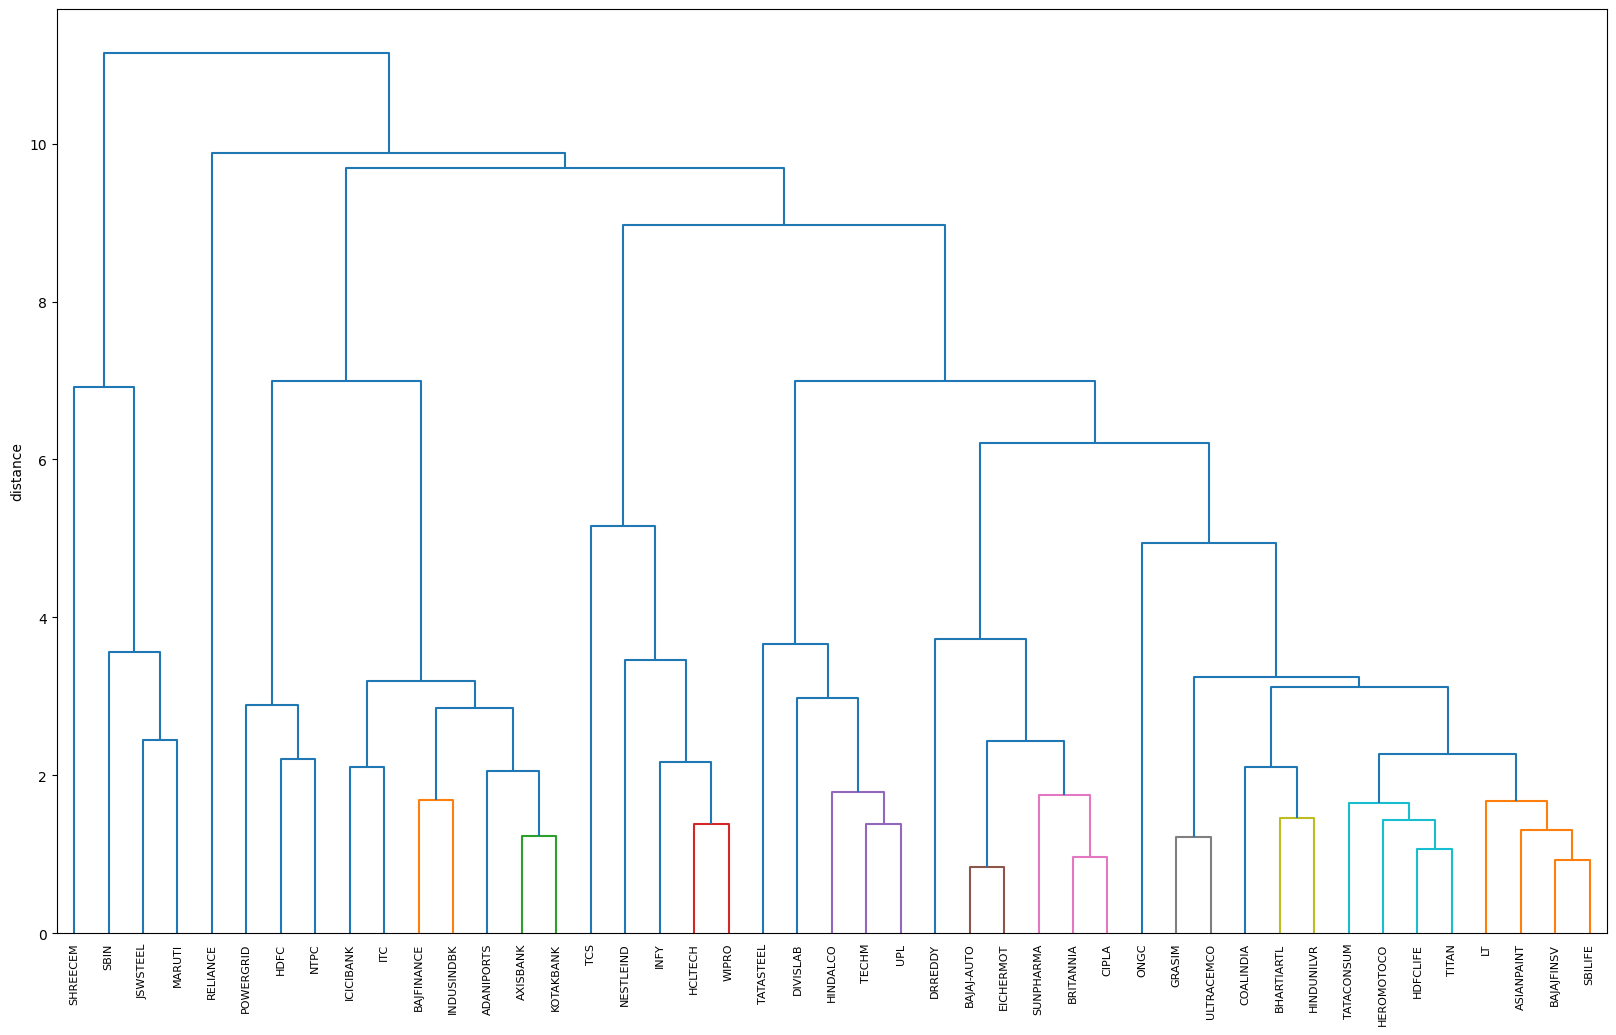

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Text(0, 0.5, 'distance')

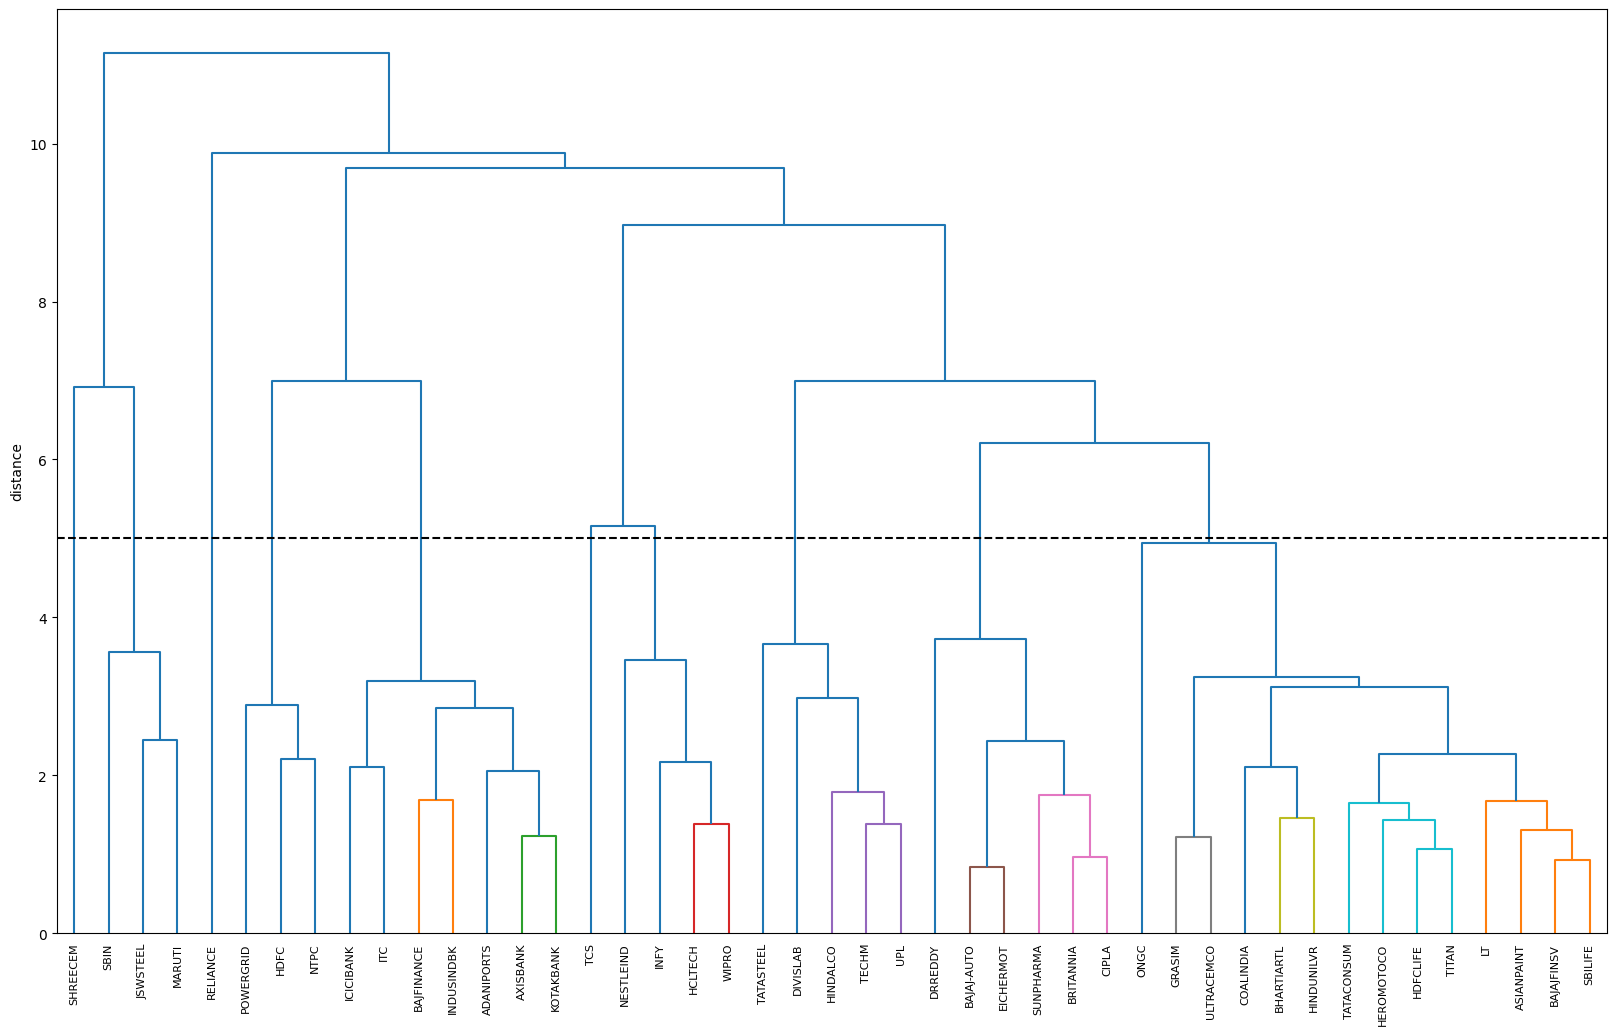

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=5, color='k', linestyle='--')
ax.set_ylabel('distance')

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 0, 0,
       0, 4, 3, 0, 1, 3, 0, 4, 1, 0, 2, 1, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1,
       4])

In [ ]:
viz_df = scaled_df
viz_df['Y_Predicted'] = y_pred

In [ ]:
viz_df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020,Y_Predicted
ADANIPORTS,-0.435368,-0.237479,1.402555,-0.435131,-0.576777,-0.391162,1.374430,1.317802,-0.371467,0
ASIANPAINT,-0.008101,-0.494662,0.534241,-0.486906,-0.493051,-0.391162,-0.160617,0.540527,0.098512,1
AXISBANK,0.038332,0.699702,0.273941,-0.158974,-0.354153,-0.222180,0.741436,0.267900,-1.320722,0
BAJAJ-AUTO,-0.557348,-0.627391,0.316677,0.549110,-0.462951,-0.391162,0.166703,0.385845,0.215212,1
BAJFINANCE,0.550599,-0.610215,0.143791,0.384841,-0.543313,-0.391162,3.086893,0.149955,-1.027231,0


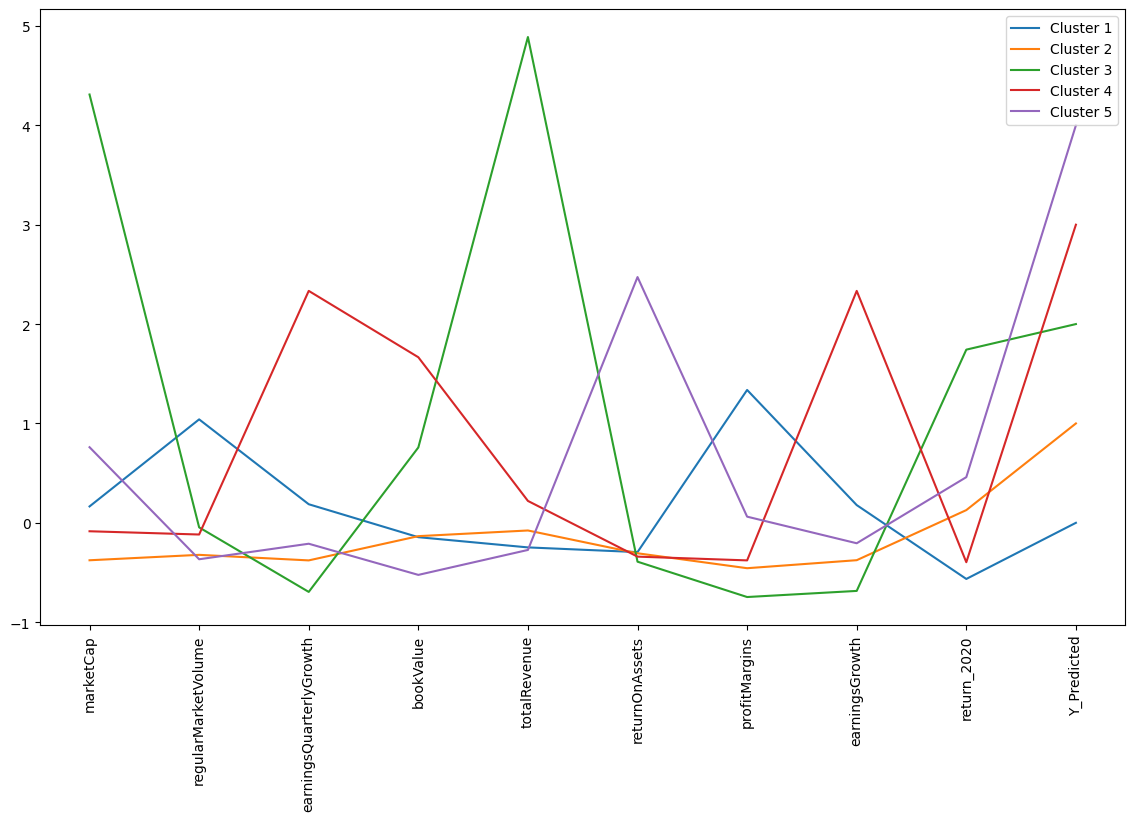

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


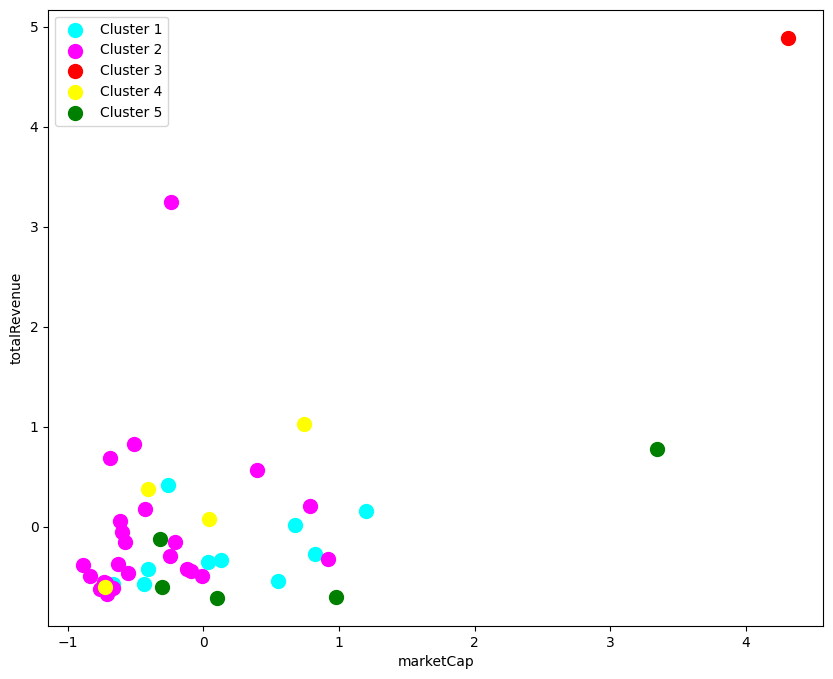

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['Y_Predicted'] == 0]['marketCap'], viz_df[viz_df['Y_Predicted'] == 0]['totalRevenue'], s=100, c='Cyan', label='Cluster 1')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 1]['marketCap'], viz_df[viz_df['Y_Predicted'] == 1]['totalRevenue'], s=100, c='Magenta', label='Cluster 2')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 2]['marketCap'], viz_df[viz_df['Y_Predicted'] == 2]['totalRevenue'], s=100, c='Red', label='Cluster 3')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 3]['marketCap'], viz_df[viz_df['Y_Predicted'] == 3]['totalRevenue'], s=100, c='Yellow', label='Cluster 4')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 4]['marketCap'], viz_df[scaled_df['Y_Predicted'] == 4]['totalRevenue'], s=100, c='Green', label='Cluster 5')
plt.xlabel('marketCap')
plt.ylabel('totalRevenue')
plt.legend()
plt.show()

## **Gaussian Mixture Model**

In [ ]:
from  sklearn.mixture import GaussianMixture

def make_clusters(data, no_of_components):
    """
       data -> numpy array for the data
       no_of_components -> number of a mixture of components
       return a Numpy array of labels
    """

    # initialize gmm model
    gmm = GaussianMixture(n_components=no_of_components,random_state=0)

    # fit the model
    gmm.fit(data)

    #predict labels for the data
    labels = gmm.predict(data)

    return labels

## **DBSCAN**

### Preparing dataset for DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 34.2MB/s]


In [ ]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [ ]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


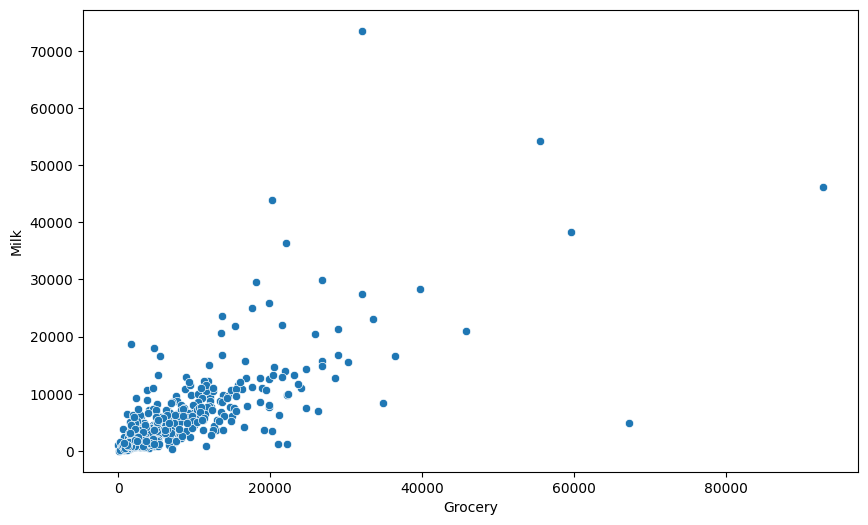

In [ ]:
sns.scatterplot(data = df, x = 'Grocery', y = 'Milk')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std =scaler.fit_transform(df)

In [ ]:
df_std = pd.DataFrame(df_std, columns = df.columns)
df_std.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
df_std = df_std[['Grocery', 'Milk']]

In [ ]:
df_std.head()

,Grocery,Milk
0,-0.041115,0.523568
1,0.170318,0.544458
2,-0.028157,0.408538
3,-0.392977,-0.624020
4,-0.079356,-0.052396


### Code

In [ ]:
#IMPORT DBSCAN
from sklearn.cluster import DBSCAN


def segmentSubscribers(X_train, epsilon, min_samp):

  # INITIALIZE DBSCAN CLASS WITH EPSILON AND MIN_SAMPLES
  dbsc = DBSCAN(eps = epsilon,min_samples=min_samp).fit(X_train)

  # ACCESS LABELS
  labels = dbsc.labels_

  return labels

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbsc = DBSCAN(eps = 0.5, min_samples = 5)
dbsc.fit(df_std)

DBSCAN()

In [ ]:
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
pd.value_counts(labels)

 0    415
-1     25
dtype: int64

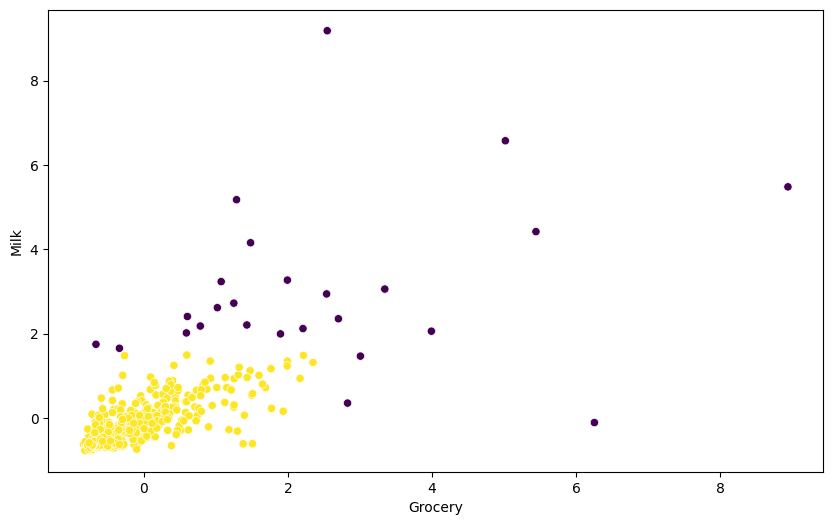

In [ ]:
sns.scatterplot(data = df_std , x= 'Grocery', y = 'Milk', c = labels)
plt.show()

# **Anamoly Detection**

In [ ]:
df = pd.read_csv('AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


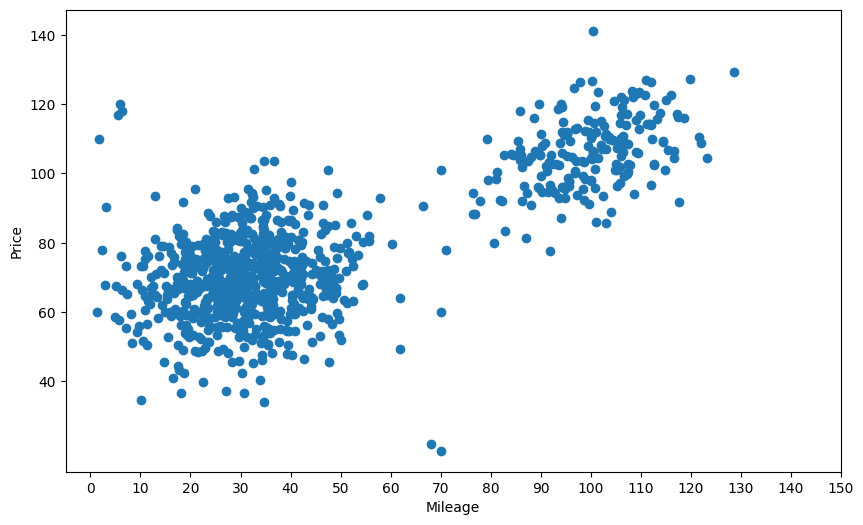

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

## **Elliptic Envolope**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
df = pd.read_csv('AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


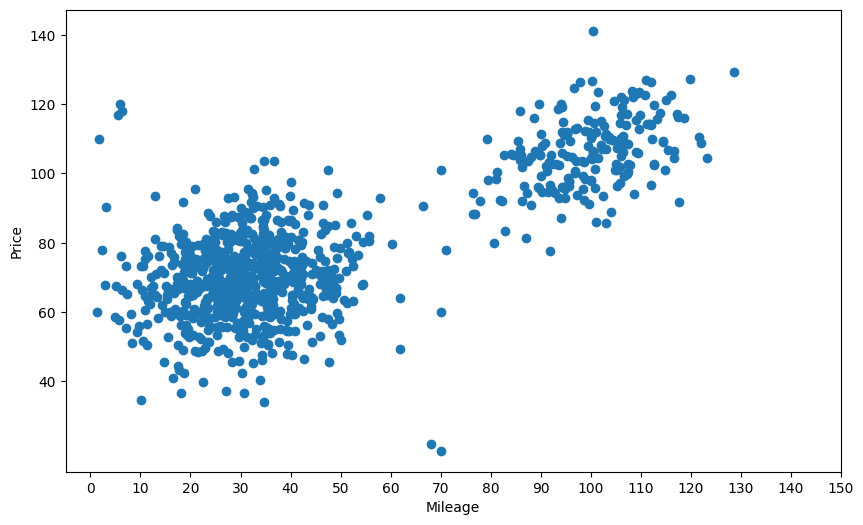

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df.shape

(908, 2)

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
model = EllipticEnvelope(contamination=0.02)
model.fit(df)
df['is_outlier_ee'] = model.predict(df)

In [ ]:
df.head()

,Mileage,Price,is_outlier_ee
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


In [ ]:
df['is_outlier_ee'].value_counts()

 1    889
-1     19
Name: is_outlier_ee, dtype: int64

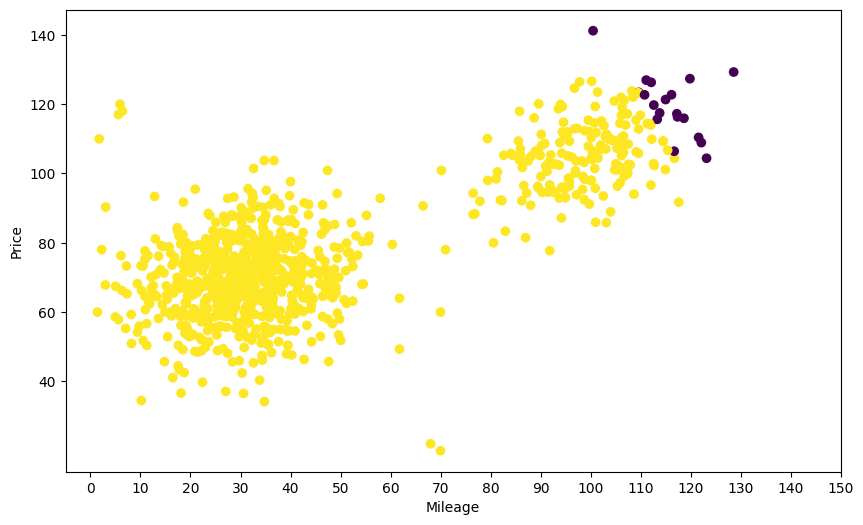

In [ ]:
plt.scatter(df.Mileage, df.Price, c = df['is_outlier_ee'])
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df.head()

,Mileage,Price,is_outlier_ee
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


## **Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(contamination=0.02)
df['is_outlier_if'] = model.fit_predict(df[['Mileage', 'Price']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df['is_outlier_if'].value_counts()

 1    889
-1     19
Name: is_outlier_if, dtype: int64

In [ ]:
df.head()

,Mileage,Price,is_outlier_ee,is_outlier_if
0,54.282388,67.967708,1,1
1,17.331911,70.023637,1,1
2,36.548113,68.080455,1,1
3,42.567541,71.058755,1,1
4,5.608853,57.822432,1,1


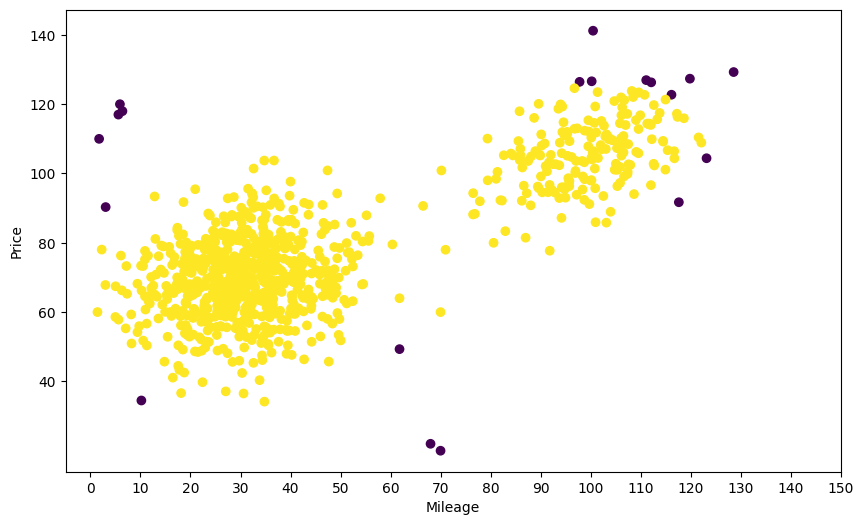

In [ ]:
plt.scatter(df.Mileage, df.Price, c = df['is_outlier_if'])
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
# For Boundary Display

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

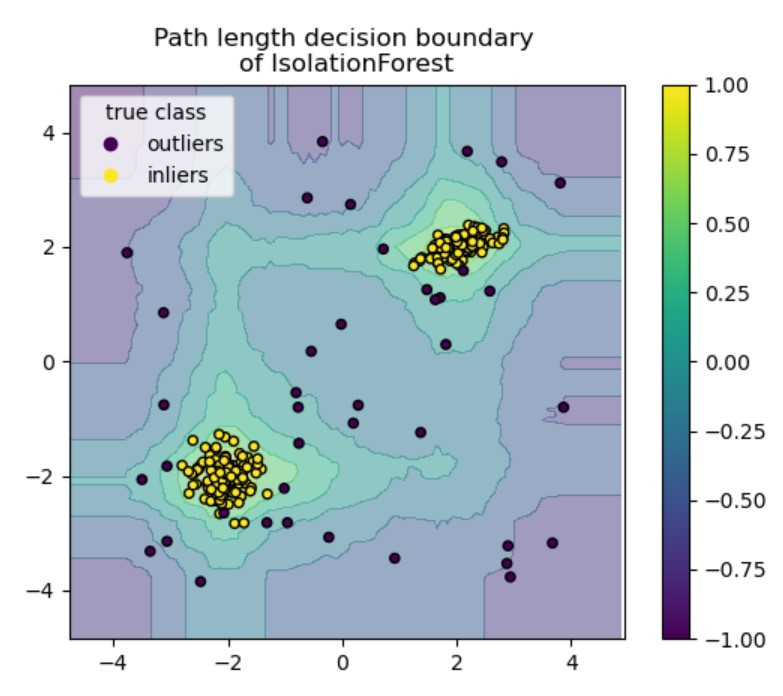

## **LOF [Local Outlier Factor]**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
model = LocalOutlierFactor(contamination=0.015)
df['is_outlier_lof'] = model.fit_predict(df[['Mileage', 'Price']])

In [ ]:
df['is_outlier_lof'].value_counts()

 1    894
-1     14
Name: is_outlier_lof, dtype: int64

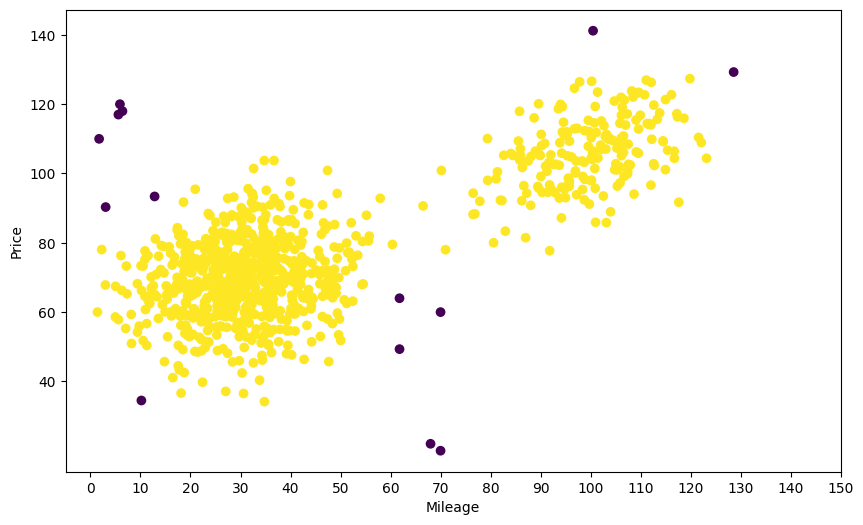

In [ ]:
plt.scatter(df.Mileage, df.Price, c = df['is_outlier_lof'])
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# **High Dimension Visualization**

## PCA

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
X = digits.data
Y = digits.target
X.shape, Y.shape

((1797, 64), (1797,))

In [ ]:
X[0].reshape(8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

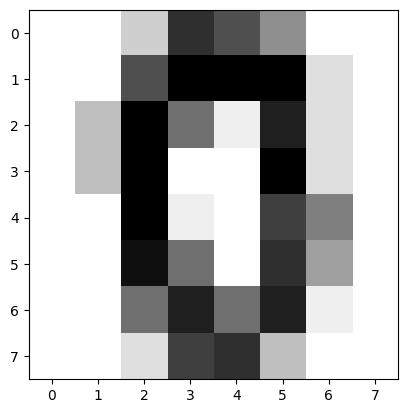

In [ ]:
from matplotlib.pyplot import cm

plt.imshow(X[20].reshape(8, 8), cmap = plt.cm.gray_r);

In [ ]:
X[Y==0]

array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       [0., 0., 3., ..., 4., 0., 0.],
       ...,
       [0., 0., 9., ..., 4., 0., 0.],
       [0., 0., 5., ..., 8., 1., 0.],
       [0., 0., 6., ..., 6., 0., 0.]])

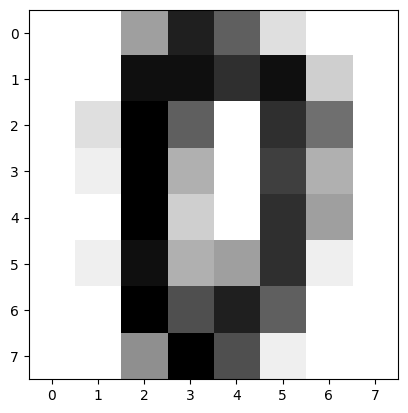

In [ ]:
plt.imshow(X[Y==0][4].reshape(8, 8), cmap = plt.cm.gray_r)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Z1 = pca.fit_transform(X)

In [ ]:
Z1.shape

(1797, 2)

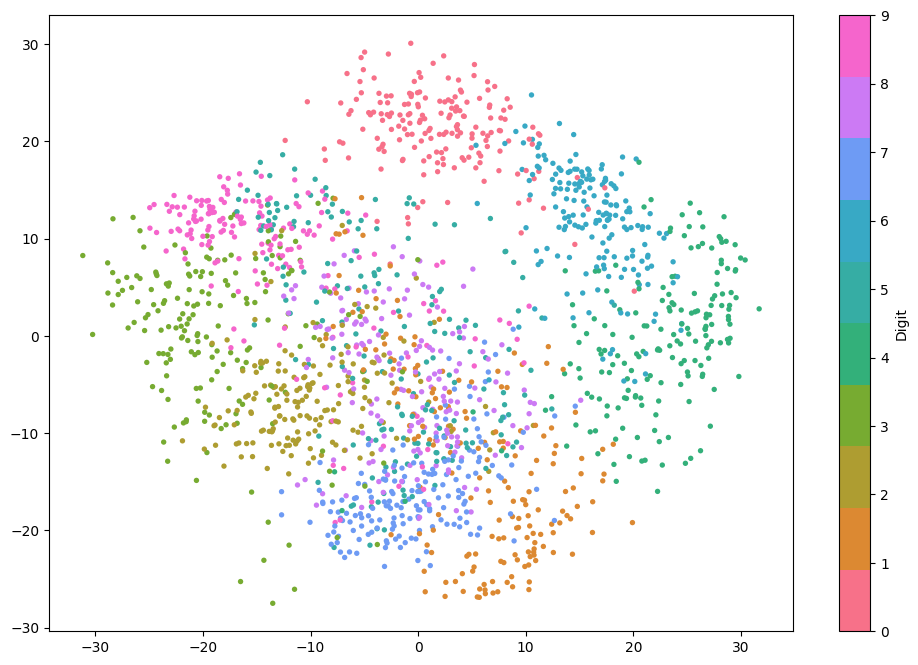

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(Z1[:,0], Z1[:,1], s=15, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')


### Variance Explantion

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [ ]:
pca.explained_variance_ratio_.sum()

0.2850936482367535

In [ ]:
# how many features(n-components) should i take to preserve 95% of variance ?

pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.149, 0.136, 0.118, 0.084, 0.058, 0.049, 0.043, 0.037, 0.034,
       0.031, 0.024, 0.023, 0.018, 0.018, 0.015, 0.014, 0.013, 0.012,
       0.01 , 0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006,
       0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [ ]:
pca.explained_variance_ratio_.round(4).cumsum()

array([0.1489, 0.2851, 0.403 , 0.4871, 0.5449, 0.5941, 0.6373, 0.6739,
       0.7074, 0.7382, 0.7619, 0.7846, 0.8028, 0.8205, 0.8352, 0.8493,
       0.8625, 0.875 , 0.8852, 0.8943, 0.9032, 0.9112, 0.9189, 0.9261,
       0.9331, 0.9391, 0.9449, 0.9501, 0.955 , 0.9593, 0.963 , 0.9665,
       0.9699, 0.9732, 0.9763, 0.9792, 0.9818, 0.9841, 0.9863, 0.9884,
       0.9903, 0.9919, 0.9934, 0.9948, 0.996 , 0.9971, 0.9981, 0.9989,
       0.9995, 0.9999, 1.0001, 1.0002, 1.0003, 1.0004, 1.0004, 1.0004,
       1.0004, 1.0004, 1.0004, 1.0004, 1.0004, 1.0004, 1.0004, 1.0004])

In [ ]:
np.cov(X)

array([[27.29265873,  6.79613095, 10.8531746 , ..., 17.3640873 ,
        22.63095238, 17.41666667],
       [ 6.79613095, 42.51165675, 27.7718254 , ..., 32.96676587,
        22.23214286, 22.06150794],
       [10.8531746 , 27.7718254 , 40.3015873 , ..., 31.66269841,
        19.26984127, 25.23809524],
       ...,
       [17.3640873 , 32.96676587, 31.66269841, ..., 46.13392857,
        27.28174603, 36.62301587],
       [22.63095238, 22.23214286, 19.26984127, ..., 27.28174603,
        39.15873016, 27.66666667],
       [17.41666667, 22.06150794, 25.23809524, ..., 36.62301587,
        27.66666667, 40.26984127]])

In [ ]:
np.cov(X).shape

(1797, 1797)

### Scratch Code

In [ ]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 4.43MB/s]


In [ ]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


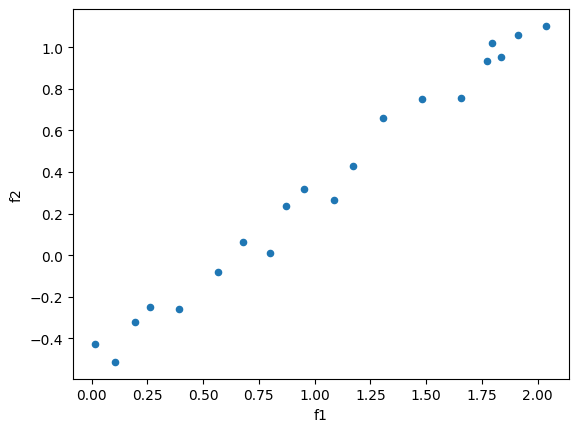

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

In [ ]:
# Step1: Mean centering
X = (data - data.mean(axis = 0))/data.std(axis=0)
X.head()

,f1,f2
0,1.506222,1.415682
1,-0.265151,-0.178906
2,1.138257,1.263742
3,-1.425667,-1.565047
4,0.659017,0.766476


In [ ]:
# Step2 : cov matrix
V = np.dot(X.T, X)/(len(X)-1)
V

array([[1.        , 0.99232766],
       [0.99232766, 1.        ]])

In [ ]:
# same result as above for cavariance matrix calculation
np.cov(X.T)

array([[1.        , 0.99232766],
       [0.99232766, 1.        ]])

In [ ]:
# Step3 : eig values and eig vectors
eigValues, eigVectors = np.linalg.eig(V)
print(f"eigen value={eigValues} and eigen vector={eigVectors}")

In [ ]:
eigValues

array([1.99232766, 0.00767234])

In [ ]:
eigVectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
# Each columns is a Eigen Vector
u = eigVectors[:, 0].reshape(2, 1)
u

array([[0.70710678],
       [0.70710678]])

In [ ]:
X.shape

(20, 2)

In [ ]:
# step4:  projecting X onto u
X_new = np.dot(X, u)

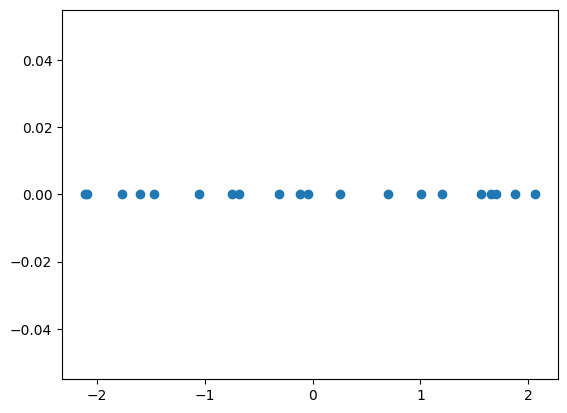

In [ ]:
plt.scatter(X_new, np.zeros(20))
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca.explained_variance_
# same Eigen values as obtained from scratch code

array([1.99232766, 0.00767234])

### Practice from Scratch data

In [ ]:
x = np.array([ [ 1, -1], [-1, 1], [2, 2], [-2, -2] ])

In [ ]:
X = pd.DataFrame(x, columns = ("f1","f2"))

In [ ]:
X

,f1,f2
0,1,-1
1,-1,1
2,2,2
3,-2,-2


In [ ]:
Xs = (X - X.mean(axis = 0))/X.std(axis=0)

In [ ]:
eigValues, eigVectors = np.linalg.eig(np.cov(Xs.T))

In [ ]:
eigValues


array([1.6, 0.4])

In [ ]:
eigVectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
Z= pca.fit_transform(X)
pca.explained_variance_

array([5.33333333])

In [ ]:
Z

array([[ 4.33362672e-16],
       [ 1.07265374e-17],
       [ 2.82842712e+00],
       [-2.82842712e+00]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
Z =pca.fit_transform(Xs)
pca.explained_variance_

array([1.6])

In [ ]:
Z

array([[ 1.28583315e-16],
       [-1.15743672e-16],
       [ 1.54919334e+00],
       [-1.54919334e+00]])

## t-SNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target

In [ ]:
model = TSNE(n_components = 2, perplexity = 25, random_state = 0)
Z = model.fit_transform(X)

In [ ]:
Z.shape

(1797, 2)

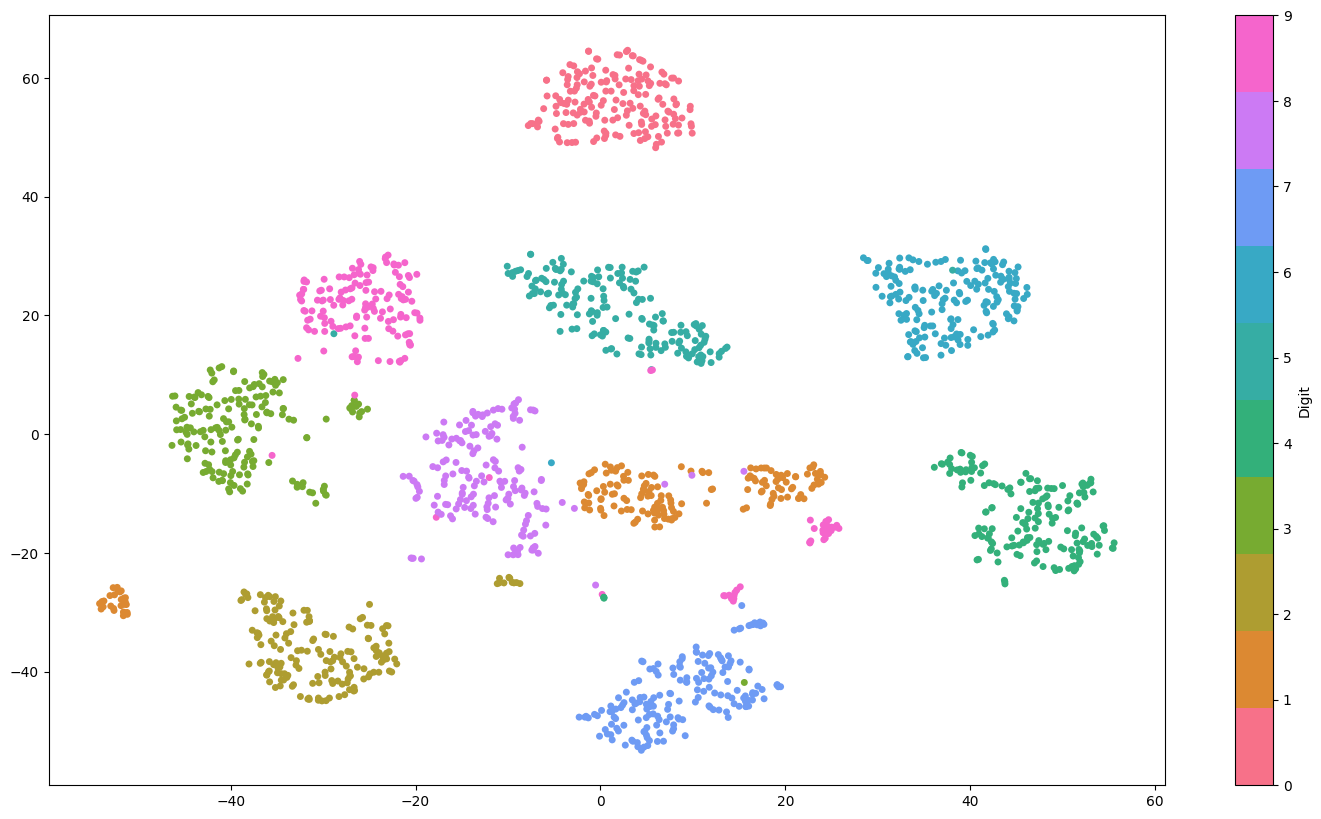

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))


plt.rcParams["figure.figsize"] = (18,10)
fig, ax = plt.subplots()
im = ax.scatter(Z[:,0], Z[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

## UMAP

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]


In [ ]:
import umap
import umap.plot

In [ ]:
X_embedded_UMAP = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

In [ ]:
X_embedded_UMAP.shape

(1797, 2)

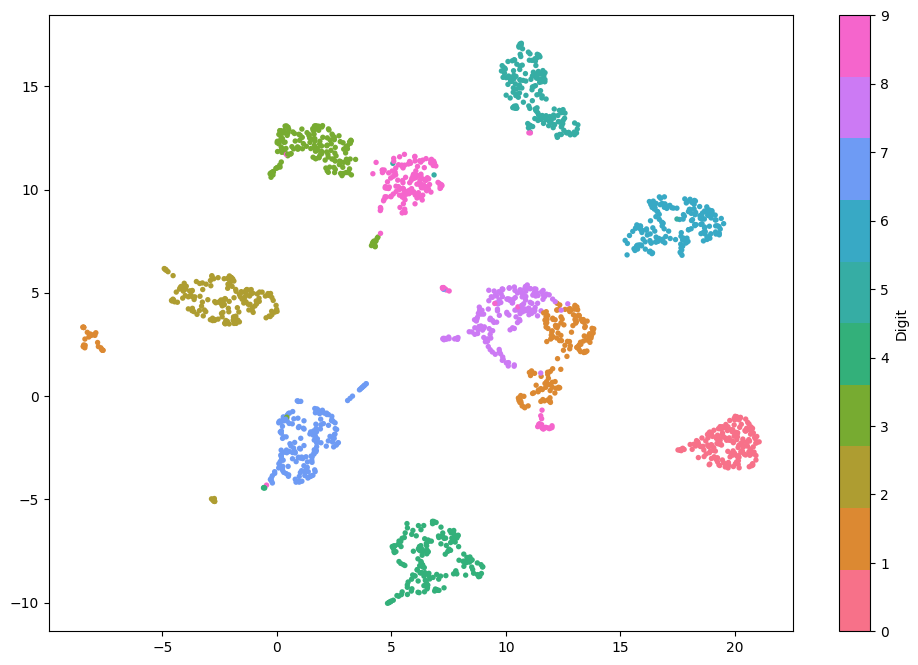

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(X_embedded_UMAP[:,0], X_embedded_UMAP[:,1], s=15, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')


* UMAP includes a subpackage umap.plot for plotting the results of UMAP embeddings. This package needs to be imported separately since it has extra requirements (matplotlib, datashader and holoviews). It allows for fast and simple plotting and attempts to make sensible decisions to avoid overplotting and other pitfalls.

<Axes: >

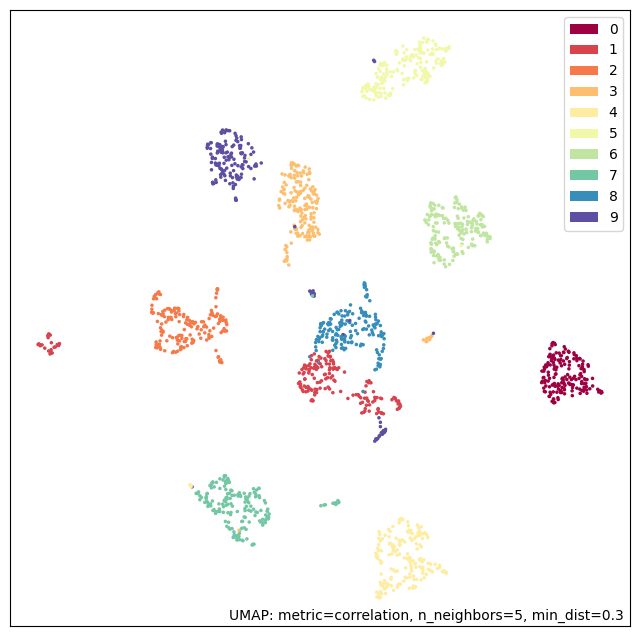

In [ ]:
# using Umap Plot

from sklearn.datasets import load_digits

digits = load_digits()

mapper = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(digits.data)
umap.plot.points(mapper, labels=digits.target)

* The densMAP algorithm augments UMAP to additionally preserve local density information in addition to the topological structure captured by UMAP. One can easily run densMAP using the umap package by setting the densmap input flag:

<Axes: >

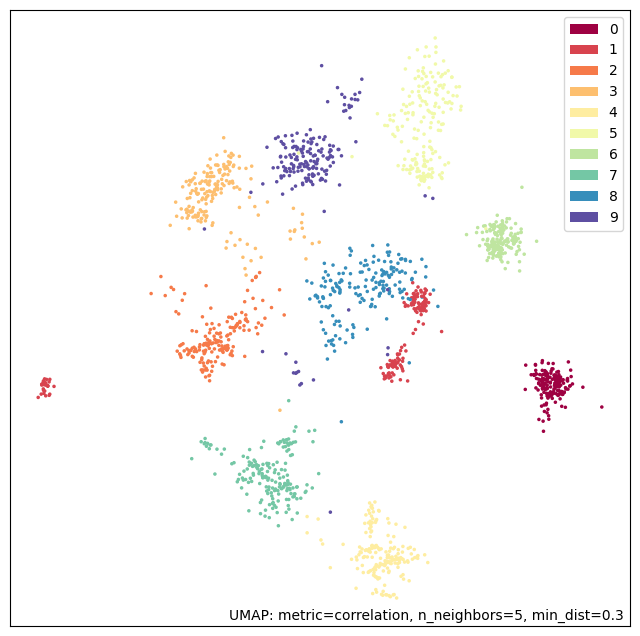

In [ ]:
# Densemap

embedding = umap.UMAP(densmap=True,n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(digits.data)

umap.plot.points(embedding, labels=digits.target)